In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fanalysis.mca import MCA
from factor_analyzer import FactorAnalyzer

In [2]:
df_mca= pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\2. Data Analysis\MCA\Timesheet\MCA_data_TIME\MCA_Timesheet.csv")
df_mca = df_mca.drop(df_mca.columns[0], axis=1)

## Treatments relative to Original DataBase

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Timesheet\ZX_Timesheet_V5.csv")
df = df.drop(df.columns[0], axis=1)

df['DEBACQ'] = pd.to_datetime(df['DEBACQ'])
df['FINACQ'] = pd.to_datetime(df['FINACQ'])

df['DATDEB'] = pd.to_datetime(df['DATDEB'])
df['DATFIN'] = pd.to_datetime(df['DATFIN'])

df['DEBABS'] = pd.to_datetime(df['DEBABS'])
df['FINABS'] = pd.to_datetime(df['FINABS'])

df['DTUPD1'] = pd.to_datetime(df['DTUPD1'])

df['TILOAD'] = pd.to_datetime(df['TILOAD'])
df['ANNEE_REF'] = pd.to_datetime(df['ANNEE_REF'])

In [4]:
cols_all = df.columns

cols_Date = []
cols_numeric = []
cols_obj = []
cols_bool = []
for col_name in cols_all:
    col_type = df[col_name].dtype
    if col_type == 'datetime64[ns]':
        cols_Date.append(col_name)
    elif col_type in ['int64', 'int32', 'float64','float32']:
        cols_numeric.append(col_name)
    elif col_type == 'object':
        cols_obj.append(col_name)
    elif col_type == 'bool':
        cols_bool.append(col_name)

In [6]:
df.shape

(768420, 41)

In [15]:
df.values.shape

(768420, 41)

## MCA DataFrame

In [16]:
#df_mca = df[cols_obj]

In [18]:
#df_mca.to_csv("MCA_Timesheet.csv",sep=',',na_rep='NaN')

In [4]:
df_mca.drop('LIBELL', axis=1, inplace=True)

In [24]:
#df_mca.to_csv("MCA_Timesheet.csv",sep=',',na_rep='NaN')

In [87]:
df_mca.drop(['LIBELL'], axis=1, inplace=True)

In [7]:
df_mca.drop(['ABS_DUR'], axis=1, inplace=True)

In [9]:
df_mca.drop(['CONSOM_DUR'], axis=1, inplace=True)

In [45]:
df_mca.drop(['ACQ_DUR'], axis=1, inplace=True)

In [90]:
df_mca.shape

(768420, 6)

In [92]:
X = df_mca.iloc[:,:4].values

In [93]:
my_mca = MCA() # n_components=9

In [94]:
len(X)
# batch = 100 000 - 6 cols
# 70000 - 8 cols

768420

In [95]:
batch_size = 70000  # 1/10 des données totales

for i in range(0, len(X), batch_size):
    batch_data = X[i:i+batch_size]
    my_mca.fit(batch_data)
    print(f'done {i}')

done 0
done 70000
done 140000
done 210000
done 280000
done 350000
done 420000
done 490000
done 560000
done 630000
done 700000


In [96]:
eig = pd.DataFrame(my_mca.eig_)
eig

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.420945,0.359535,0.327868,0.289750,0.287214,0.280643,0.272950,0.270940,0.266666,0.263570,...,0.233406,0.230962,0.229796,0.224869,0.218546,0.215075,0.206052,0.176476,0.144400,0.085433
1,4.106779,3.507661,3.198713,2.826828,2.802092,2.737984,2.662925,2.643314,2.601620,2.571412,...,2.277130,2.253290,2.241908,2.193842,2.132155,2.098292,2.010263,1.721721,1.408777,0.833495
2,4.106779,7.614440,10.813153,13.639981,16.442073,19.180057,21.842982,24.486296,27.087916,29.659328,...,83.106255,85.359546,87.601454,89.795296,91.927451,94.025743,96.036006,97.757728,99.166505,100.000000


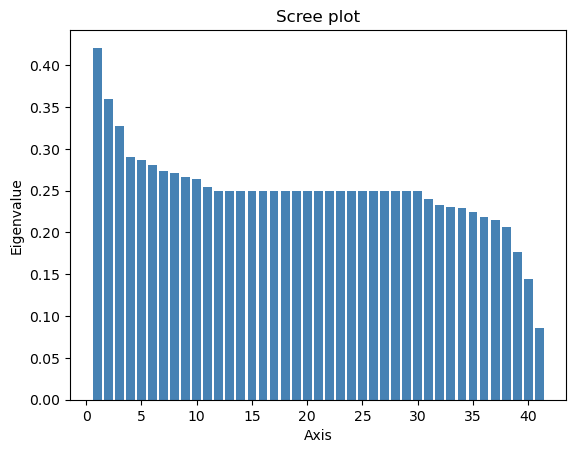

<Figure size 640x480 with 0 Axes>

In [97]:
my_mca.plot_eigenvalues()
plt.savefig("Scree_plot_MCA_Timesheet.png")

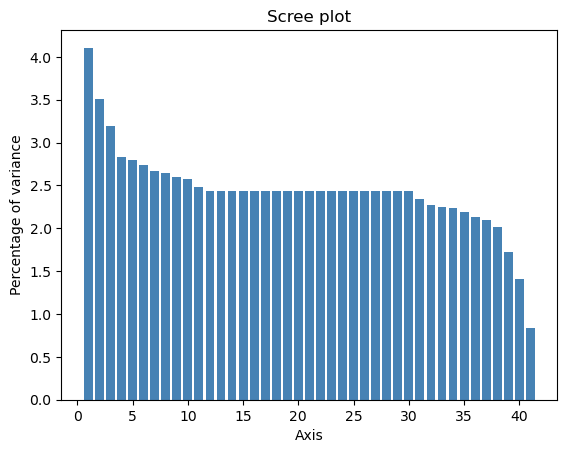

<Figure size 640x480 with 0 Axes>

In [98]:
my_mca.plot_eigenvalues(type="percentage")
plt.savefig("Scree_Perc_plot_MCA_Timesheet.png")

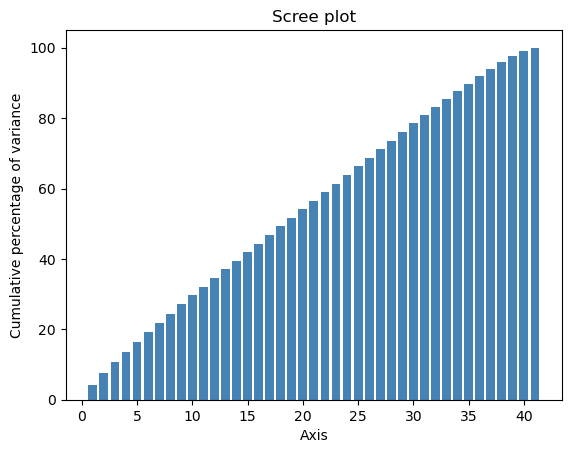

<Figure size 640x480 with 0 Axes>

In [99]:
my_mca.plot_eigenvalues(type="cumulative")
plt.savefig('Scree_plot_Cum_Perc_Var_MCA_Timesheet.png')

## 1. Statistics extraction Line point

In [100]:
df_rows = my_mca.row_topandas()

In [101]:
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6,row_coord_dim7,row_coord_dim8,row_coord_dim9,row_coord_dim10,...,row_cos2_dim32,row_cos2_dim33,row_cos2_dim34,row_cos2_dim35,row_cos2_dim36,row_cos2_dim37,row_cos2_dim38,row_cos2_dim39,row_cos2_dim40,row_cos2_dim41
row0,0.041248,0.357566,0.703235,0.150490,-0.040586,0.385019,-0.099308,0.234929,-0.109039,0.018683,...,0.000542,0.043043,3.228702e-02,0.250619,0.010169,0.015337,0.004842,0.013411,0.000140,0.005345
row1,0.041248,0.357566,0.703235,0.150490,-0.040586,0.385019,-0.099308,0.234929,-0.109039,0.018683,...,0.000542,0.043043,3.228702e-02,0.250619,0.010169,0.015337,0.004842,0.013411,0.000140,0.005345
row2,-0.217786,0.009189,-0.031235,0.303101,0.040823,0.423971,-0.174702,0.043015,-0.134729,0.237351,...,0.012710,0.060913,7.543651e-03,0.162505,0.055885,0.002293,0.031518,0.359022,0.015186,0.008033
row3,-0.001588,0.256932,0.466387,0.447050,0.027392,0.348489,-0.078186,0.122811,-0.204816,0.263918,...,0.040989,0.062094,3.968928e-03,0.276013,0.009970,0.006304,0.055014,0.022947,0.002131,0.009323
row4,0.066062,0.353765,0.806501,-0.516855,-0.026828,0.665749,-0.351882,0.167547,-0.289384,0.514225,...,0.027717,0.007382,3.328943e-08,0.052994,0.006484,0.001869,0.142515,0.000226,0.000200,0.001845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
row68415,-0.179490,0.007656,0.113209,0.249600,-0.162842,-0.130527,0.227013,-0.239155,0.368561,-0.183961,...,0.002068,0.003790,1.022134e-01,0.023034,0.008033,0.009472,0.108762,0.189963,0.004215,0.000352
row68416,-0.179490,0.007656,0.113209,0.249600,-0.162842,-0.130527,0.227013,-0.239155,0.368561,-0.183961,...,0.002068,0.003790,1.022134e-01,0.023034,0.008033,0.009472,0.108762,0.189963,0.004215,0.000352
row68417,-0.111840,0.104489,0.453324,-0.714305,-0.217062,0.186733,-0.046683,-0.194419,0.283992,0.066346,...,0.003113,0.018043,5.679378e-02,0.058199,0.004298,0.001959,0.168400,0.129194,0.003432,0.001459
row68418,-0.136655,0.108290,0.350058,-0.046960,-0.230820,-0.093997,0.205891,-0.127037,0.464338,-0.429196,...,0.021948,0.003575,1.083481e-02,0.004505,0.007882,0.020810,0.004505,0.134782,0.007402,0.000779


In [102]:
df_rows.describe()

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6,row_coord_dim7,row_coord_dim8,row_coord_dim9,row_coord_dim10,...,row_cos2_dim32,row_cos2_dim33,row_cos2_dim34,row_cos2_dim35,row_cos2_dim36,row_cos2_dim37,row_cos2_dim38,row_cos2_dim39,row_cos2_dim40,row_cos2_dim41
count,6.842000e+04,68420.000000,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,...,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04
mean,1.661602e-17,0.000000,-4.984807e-17,-6.646410e-18,-1.453902e-17,-9.865764e-18,-1.827763e-17,-8.308012e-18,4.320166e-17,-3.323205e-18,...,1.353895e-02,1.896521e-02,3.085498e-02,4.514575e-02,4.693871e-02,1.933051e-02,5.138032e-02,7.553113e-02,7.463482e-03,4.801888e-03
std,6.488074e-01,0.599617,5.726018e-01,5.382882e-01,5.359278e-01,5.297617e-01,5.224498e-01,5.205225e-01,5.164010e-01,5.133942e-01,...,1.931587e-02,2.915311e-02,3.148502e-02,6.869714e-02,5.121736e-02,3.695720e-02,7.000105e-02,9.968584e-02,2.155396e-02,1.640730e-02
min,-4.353396e-01,-4.244927,-3.180942e+00,-3.704044e+00,-3.520989e+00,-4.690106e+00,-1.234123e+01,-1.721658e+01,-7.323117e+00,-1.719729e+01,...,6.677650e-08,1.464072e-08,3.328943e-08,3.829072e-12,9.174072e-07,3.851213e-09,1.156028e-09,2.838004e-08,1.560361e-08,7.994951e-08
25%,-3.528530e-01,-0.240087,-3.844124e-01,-9.852567e-02,-1.494108e-01,-3.999856e-01,-9.930782e-02,-1.624098e-01,-2.048161e-01,-1.914673e-01,...,1.835925e-03,3.011306e-03,3.968928e-03,3.528722e-03,8.033326e-03,2.948266e-03,4.505034e-03,1.115235e-02,9.380144e-04,7.166876e-05
50%,-1.763062e-01,0.001535,-2.482642e-02,1.216364e-01,-6.783659e-02,-9.399697e-02,4.243402e-02,1.751824e-02,-4.702824e-02,-3.802607e-02,...,3.469729e-03,5.237112e-03,2.265947e-02,1.247983e-02,2.513409e-02,8.496392e-03,1.804687e-02,2.842661e-02,2.467666e-03,5.913176e-04
75%,3.806384e-02,0.172534,3.974446e-01,2.655862e-01,2.739158e-02,3.484889e-01,1.389505e-01,1.296363e-01,3.065498e-01,1.721238e-01,...,2.083509e-02,1.757627e-02,4.631165e-02,5.819859e-02,6.856866e-02,2.080961e-02,7.544877e-02,1.377056e-01,7.402077e-03,3.535469e-03
max,3.940593e+00,3.986950,1.751833e+00,2.380734e+00,4.368231e+00,7.731826e+00,3.186720e+00,5.453981e+00,6.312706e+00,2.030975e+00,...,3.629343e-01,3.040095e-01,2.688539e-01,2.760127e-01,1.832306e-01,3.903829e-01,5.250011e-01,4.917903e-01,3.277676e-01,2.453979e-01


In [103]:
row_coord = pd.DataFrame(my_mca.row_coord_)
row_coord

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.041248,0.357566,0.703235,0.150490,-0.040586,0.385019,-0.099308,0.234929,-0.109039,0.018683,...,-0.036447,0.324933,-0.281420,0.784058,-0.157935,0.193962,0.108982,-0.181370,0.018519,0.114498
1,0.041248,0.357566,0.703235,0.150490,-0.040586,0.385019,-0.099308,0.234929,-0.109039,0.018683,...,-0.036447,0.324933,-0.281420,0.784058,-0.157935,0.193962,0.108982,-0.181370,0.018519,0.114498
2,-0.217786,0.009189,-0.031235,0.303101,0.040823,0.423971,-0.174702,0.043015,-0.134729,0.237351,...,-0.161603,0.353781,-0.124500,0.577848,-0.338866,0.068640,-0.254484,-0.858895,0.176644,0.128471
3,-0.001588,0.256932,0.466387,0.447050,0.027392,0.348489,-0.078186,0.122811,-0.204816,0.263918,...,-0.275159,0.338668,-0.085622,0.714027,-0.135703,0.107909,-0.318777,-0.205877,0.062733,0.131226
4,0.066062,0.353765,0.806501,-0.516855,-0.026828,0.665749,-0.351882,0.167547,-0.289384,0.514225,...,-0.325476,0.167969,-0.000357,0.450049,-0.157428,0.084520,0.738038,-0.029365,0.027639,0.083980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68415,-0.179490,0.007656,0.113209,0.249600,-0.162842,-0.130527,0.227013,-0.239155,0.368561,-0.183961,...,-0.047013,-0.063635,0.330487,-0.156885,-0.092651,0.100608,-0.340909,0.450542,-0.067113,-0.019398
68416,-0.179490,0.007656,0.113209,0.249600,-0.162842,-0.130527,0.227013,-0.239155,0.368561,-0.183961,...,-0.047013,-0.063635,0.330487,-0.156885,-0.092651,0.100608,-0.340909,0.450542,-0.067113,-0.019398
68417,-0.111840,0.104489,0.453324,-0.714305,-0.217062,0.186733,-0.046683,-0.194419,0.283992,0.066346,...,-0.097330,-0.234334,0.415753,-0.420863,-0.114375,0.077219,0.715906,0.627054,-0.102207,-0.066644
68418,-0.136655,0.108290,0.350058,-0.046960,-0.230820,-0.093997,0.205891,-0.127037,0.464338,-0.429196,...,0.191698,-0.077370,0.134689,-0.086854,-0.114882,0.186661,0.086850,0.475049,-0.111326,-0.036127


In [104]:
row_contrib = pd.DataFrame(my_mca.row_contrib_)
row_contrib

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,5.907275e-06,5.197418e-04,0.002205,0.000114,0.000008,0.000772,0.000053,0.000298,0.000065,0.000002,...,0.000008,0.000668,5.037162e-04,0.003996,0.000167,0.000256,0.000084,0.000272,0.000003,0.000224
1,5.907275e-06,5.197418e-04,0.002205,0.000114,0.000008,0.000772,0.000053,0.000298,0.000065,0.000002,...,0.000008,0.000668,5.037162e-04,0.003996,0.000167,0.000256,0.000084,0.000272,0.000003,0.000224
2,1.646838e-04,3.432566e-07,0.000004,0.000463,0.000008,0.000936,0.000163,0.000010,0.000099,0.000312,...,0.000164,0.000792,9.858615e-05,0.002170,0.000768,0.000032,0.000459,0.006110,0.000316,0.000282
3,8.751728e-09,2.683558e-04,0.000970,0.001008,0.000004,0.000632,0.000033,0.000081,0.000230,0.000386,...,0.000474,0.000726,4.662822e-05,0.003314,0.000123,0.000079,0.000721,0.000351,0.000040,0.000295
4,1.515292e-05,5.087507e-04,0.002900,0.001348,0.000004,0.002308,0.000663,0.000151,0.000459,0.001466,...,0.000663,0.000179,8.092408e-10,0.001316,0.000166,0.000049,0.003864,0.000007,0.000008,0.000121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68415,1.118592e-04,2.382602e-07,0.000057,0.000314,0.000135,0.000089,0.000276,0.000309,0.000745,0.000188,...,0.000014,0.000026,6.946787e-04,0.000160,0.000057,0.000069,0.000824,0.001681,0.000046,0.000006
68416,1.118592e-04,2.382602e-07,0.000057,0.000314,0.000135,0.000089,0.000276,0.000309,0.000745,0.000188,...,0.000014,0.000026,6.946787e-04,0.000160,0.000057,0.000069,0.000824,0.001681,0.000046,0.000006
68417,4.342976e-05,4.438294e-05,0.000916,0.002574,0.000240,0.000182,0.000012,0.000204,0.000442,0.000024,...,0.000059,0.000347,1.099373e-03,0.001151,0.000087,0.000041,0.003635,0.003256,0.000106,0.000076
68418,6.483974e-05,4.767068e-05,0.000546,0.000011,0.000271,0.000046,0.000227,0.000087,0.001182,0.001021,...,0.000230,0.000038,1.153825e-04,0.000049,0.000088,0.000237,0.000054,0.001869,0.000125,0.000022


In [105]:
row_contrib.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,...,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04
mean,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,...,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03,1.461561e-03
std,5.666820e-03,6.388661e-03,2.736257e-03,6.661927e-03,7.083542e-03,5.567515e-03,1.727340e-02,2.532143e-02,7.852677e-03,2.684789e-02,...,2.580481e-02,1.772528e-02,1.163472e-02,9.858920e-03,5.886074e-03,6.675960e-03,4.599971e-03,2.017468e-03,7.343306e-03,6.093575e-03
min,8.751728e-09,8.562877e-09,7.576014e-09,2.440802e-08,1.005781e-10,7.530039e-11,4.734427e-10,1.793513e-09,1.828415e-09,6.550481e-09,...,5.738627e-09,5.889032e-09,8.092408e-10,1.632596e-12,1.397322e-07,3.910568e-09,3.436077e-10,1.541845e-08,2.433544e-08,3.520858e-08
25%,5.182915e-05,3.992252e-05,1.417890e-04,7.463131e-05,9.348555e-06,8.872903e-05,3.462847e-05,2.092177e-05,6.516478e-05,2.964093e-05,...,2.079622e-05,3.547736e-05,1.051483e-04,3.433606e-05,1.463418e-04,4.102475e-05,7.121207e-05,3.010696e-04,2.607069e-05,6.437547e-06
50%,1.497741e-04,2.038512e-04,6.587378e-04,3.142552e-04,6.496323e-05,7.048155e-04,1.033842e-04,9.084460e-05,3.081143e-04,1.876595e-04,...,8.044611e-05,7.275137e-05,3.033760e-04,3.233160e-04,5.852070e-04,9.348320e-05,4.916323e-04,5.449656e-04,4.890211e-05,3.214608e-05
75%,5.436229e-04,4.445432e-04,2.187919e-03,8.429110e-04,1.797974e-04,1.177349e-03,2.316185e-04,3.085333e-04,1.054585e-03,6.312714e-04,...,2.403234e-04,7.258113e-04,7.457609e-04,1.195887e-03,1.245146e-03,4.798287e-04,9.660936e-04,1.868990e-03,1.472640e-04,1.782226e-04
max,5.391566e-02,7.325139e-02,4.510547e-02,6.920634e-02,9.710061e-02,3.113338e-01,8.155505e-01,1.598961e+00,2.939281e-01,1.639990e+00,...,1.392500e+00,6.098793e-01,5.060324e-01,3.216541e-01,3.197193e-01,1.211989e-01,6.733492e-02,2.798298e-02,1.891136e-01,7.964752e-02


In [106]:
row_cos2 = pd.DataFrame(my_mca.row_cos2_)
row_cos2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.000694,0.052123,0.201613,0.009233,0.000672,0.060434,0.004021,0.022500,0.004847,0.000142,...,0.000542,0.043043,3.228702e-02,0.250619,0.010169,0.015337,0.004842,0.013411,0.000140,0.005345
1,0.000694,0.052123,0.201613,0.009233,0.000672,0.060434,0.004021,0.022500,0.004847,0.000142,...,0.000542,0.043043,3.228702e-02,0.250619,0.010169,0.015337,0.004842,0.013411,0.000140,0.005345
2,0.023083,0.000041,0.000475,0.044711,0.000811,0.087481,0.014854,0.000901,0.008834,0.027417,...,0.012710,0.060913,7.543651e-03,0.162505,0.055885,0.002293,0.031518,0.359022,0.015186,0.008033
3,0.000001,0.035738,0.117759,0.108196,0.000406,0.065747,0.003309,0.008165,0.022711,0.037708,...,0.040989,0.062094,3.968928e-03,0.276013,0.009970,0.006304,0.055014,0.022947,0.002131,0.009323
4,0.001142,0.032744,0.170182,0.069894,0.000188,0.115965,0.032396,0.007345,0.021911,0.069185,...,0.027717,0.007382,3.328943e-08,0.052994,0.006484,0.001869,0.142515,0.000226,0.000200,0.001845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68415,0.030149,0.000055,0.011994,0.058303,0.024816,0.015944,0.048228,0.053525,0.127121,0.031670,...,0.002068,0.003790,1.022134e-01,0.023034,0.008033,0.009472,0.108762,0.189963,0.004215,0.000352
68416,0.030149,0.000055,0.011994,0.058303,0.024816,0.015944,0.048228,0.053525,0.127121,0.031670,...,0.002068,0.003790,1.022134e-01,0.023034,0.008033,0.009472,0.108762,0.189963,0.004215,0.000352
68417,0.004110,0.003587,0.067522,0.167648,0.015481,0.011457,0.000716,0.012420,0.026500,0.001446,...,0.003113,0.018043,5.679378e-02,0.058199,0.004298,0.001959,0.168400,0.129194,0.003432,0.001459
68418,0.011153,0.007004,0.073187,0.001317,0.031820,0.005277,0.025318,0.009639,0.128773,0.110019,...,0.021948,0.003575,1.083481e-02,0.004505,0.007882,0.020810,0.004505,0.134782,0.007402,0.000779


In [107]:
row_cos2.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,...,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04,6.842000e+04
mean,4.089541e-02,2.682898e-02,1.012581e-01,4.881611e-02,1.557131e-02,6.416975e-02,1.442051e-02,1.611541e-02,3.857164e-02,2.777091e-02,...,1.353895e-02,1.896521e-02,3.085498e-02,4.514575e-02,4.693871e-02,1.933051e-02,5.138032e-02,7.553113e-02,7.463482e-03,4.801888e-03
std,4.886148e-02,3.535534e-02,1.252671e-01,7.684205e-02,4.221126e-02,6.693441e-02,2.056113e-02,2.589105e-02,4.797769e-02,3.481850e-02,...,1.931587e-02,2.915311e-02,3.148502e-02,6.869714e-02,5.121736e-02,3.695720e-02,7.000105e-02,9.968584e-02,2.155396e-02,1.640730e-02
min,7.328173e-07,1.655792e-08,3.618967e-08,1.062706e-07,1.399459e-08,2.201592e-10,7.760651e-09,2.314101e-09,1.824012e-08,3.540157e-08,...,6.677650e-08,1.464072e-08,3.328943e-08,3.829072e-12,9.174072e-07,3.851213e-09,1.156028e-09,2.838004e-08,1.560361e-08,7.994951e-08
25%,3.112965e-03,2.390554e-03,1.199402e-02,6.118080e-03,4.664900e-04,6.115408e-03,1.707745e-03,1.903940e-03,4.918877e-03,2.680958e-03,...,1.835925e-03,3.011306e-03,3.968928e-03,3.528722e-03,8.033326e-03,2.948266e-03,4.505034e-03,1.115235e-02,9.380144e-04,7.166876e-05
50%,2.494346e-02,1.041743e-02,3.845279e-02,1.991699e-02,3.938312e-03,3.303983e-02,8.069693e-03,5.865895e-03,2.083626e-02,1.303010e-02,...,3.469729e-03,5.237112e-03,2.265947e-02,1.247983e-02,2.513409e-02,8.496392e-03,1.804687e-02,2.842661e-02,2.467666e-03,5.913176e-04
75%,6.615767e-02,4.234158e-02,1.157938e-01,6.584652e-02,1.520002e-02,1.148880e-01,1.802362e-02,2.250035e-02,4.615177e-02,3.770831e-02,...,2.083509e-02,1.757627e-02,4.631165e-02,5.819859e-02,6.856866e-02,2.080961e-02,7.544877e-02,1.377056e-01,7.402077e-03,3.535469e-03
max,2.773426e-01,3.206313e-01,4.296893e-01,6.770518e-01,4.381645e-01,2.482407e-01,3.926363e-01,6.456270e-01,1.517632e-01,4.483000e-01,...,3.629343e-01,3.040095e-01,2.688539e-01,2.760127e-01,1.832306e-01,3.903829e-01,5.250011e-01,4.917903e-01,3.277676e-01,2.453979e-01


## 2.Statistics extraction Column point

In [108]:
df_cols = my_mca.col_topandas()

In [109]:
df_cols.shape

(45, 123)

In [110]:
df_cols

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_coord_dim7,col_coord_dim8,col_coord_dim9,col_coord_dim10,...,col_cos2_dim32,col_cos2_dim33,col_cos2_dim34,col_cos2_dim35,col_cos2_dim36,col_cos2_dim37,col_cos2_dim38,col_cos2_dim39,col_cos2_dim40,col_cos2_dim41
"col0_""MT202210""",-0.049999,0.055846,-0.154327,0.136889,-0.051307,1.070230,-0.365651,0.285684,-0.244463,0.438144,...,1.065119e-03,7.393828e-02,0.008392,2.470982e-01,0.067637,5.170158e-02,2.351859e-04,0.001349,1.633446e-03,0.000102
"col0_""MT202211""",-0.020288,-0.146577,-0.312232,-0.027606,0.177427,-0.716852,0.027603,0.174138,-0.455919,0.006588,...,5.616575e-03,1.922377e-05,0.099216,2.939942e-03,0.254990,5.271361e-02,3.865227e-02,0.000074,7.629078e-04,0.000006
"col0_""MT202212""",0.052905,0.109470,0.411912,-0.062026,-0.143166,0.014088,0.211634,-0.360274,0.613973,-0.293097,...,1.079787e-02,5.639433e-02,0.156988,1.505119e-01,0.074663,7.381895e-04,3.341799e-02,0.000580,6.970635e-05,0.000129
col1_999,3.165800,3.486372,-2.569709,-0.366462,-0.363203,-0.038850,-0.212616,0.003195,0.379768,-0.074124,...,2.212980e-03,1.226104e-03,0.000534,1.301846e-03,0.000934,3.405833e-07,9.019652e-05,0.014102,1.861536e-01,0.049353
col1_ABS,-0.011162,0.496491,-0.977353,3.140845,1.337566,0.753081,-8.178477,-22.706957,-7.271849,-1.753902,...,1.420487e-02,2.757323e-01,0.002799,1.377309e-01,0.006309,1.195028e-05,6.377431e-03,0.000574,1.744398e-04,0.000006
col1_ATR,1.345751,-0.938672,-0.559459,1.278847,-1.263635,11.466618,-7.698140,8.872492,-11.091769,-29.882494,...,3.477449e-01,7.427482e-03,0.037255,2.367107e-03,0.002037,2.293987e-03,1.653067e-04,0.000451,8.564481e-05,0.000223
col1_CPN,-0.404376,-0.195530,-0.389859,0.043541,-0.142153,-0.004990,0.032998,-0.007487,0.115170,-0.046427,...,8.547492e-03,8.025690e-04,0.004142,1.415131e-02,0.002800,6.451902e-03,2.635137e-02,0.233122,1.702361e-02,0.036680
col1_CSO,-0.358010,0.048484,0.813750,-6.083833,-0.789858,-0.021263,-1.221688,-0.178452,-0.789703,0.169033,...,4.182495e-03,2.784619e-04,0.010343,5.220204e-03,0.025885,1.021248e-03,3.421517e-01,0.001267,7.935921e-05,0.000339
col1_CSS,2.021807,-1.502935,-0.220251,-0.742699,3.461609,0.736383,1.367952,-0.298518,0.036032,-0.220828,...,2.033313e-03,8.983401e-03,0.003146,1.112491e-02,0.023774,2.802229e-01,2.006259e-04,0.007244,1.606447e-02,0.027981
col1_MAB,3.895406,-4.141660,1.139320,1.682205,5.646275,-4.665533,-18.663411,3.715562,10.115246,-0.034498,...,3.106422e-02,6.188991e-02,0.226412,1.641572e-02,0.089991,8.677236e-04,2.995792e-03,0.002267,5.593314e-03,0.003704


In [111]:
df_cols.describe()

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_coord_dim7,col_coord_dim8,col_coord_dim9,col_coord_dim10,...,col_cos2_dim32,col_cos2_dim33,col_cos2_dim34,col_cos2_dim35,col_cos2_dim36,col_cos2_dim37,col_cos2_dim38,col_cos2_dim39,col_cos2_dim40,col_cos2_dim41
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,4.500000e+01,4.500000e+01,45.000000,4.500000e+01,45.000000,4.500000e+01,4.500000e+01,45.000000,4.500000e+01,45.000000
mean,1.726200,0.596903,-0.506399,0.013534,0.072570,0.259290,-0.813561,-0.423251,-0.311030,-0.661614,...,2.184609e-02,2.182914e-02,0.023011,2.382533e-02,0.023615,2.054335e-02,2.171971e-02,0.027293,1.352202e-02,0.008352
std,1.759901,2.290364,1.348068,1.303760,1.970354,2.321610,3.649413,4.306881,3.115685,4.662472,...,5.577708e-02,5.129245e-02,0.044905,4.943607e-02,0.044239,4.789380e-02,6.428323e-02,0.078532,3.183564e-02,0.015825
min,-0.404376,-5.676114,-3.786975,-6.083833,-4.158090,-4.665533,-18.663411,-22.706957,-11.091769,-29.882494,...,1.815446e-09,6.398062e-07,0.000050,7.692204e-07,0.000041,3.405833e-07,1.458447e-07,0.000013,6.762543e-07,0.000002
25%,-0.011162,-0.133449,-1.010892,-0.443878,-0.363203,-0.490489,-0.957058,-0.298518,-1.123972,-0.220828,...,5.131637e-04,3.782115e-04,0.001518,1.603885e-03,0.000908,8.677236e-04,2.006259e-04,0.000332,2.470760e-04,0.000339
50%,1.756478,0.209162,-0.220251,0.136889,-0.051307,0.014088,0.027603,0.036753,-0.244463,0.114510,...,5.616575e-03,3.689820e-03,0.007123,5.134306e-03,0.005932,2.480655e-03,7.385071e-04,0.001624,3.653804e-03,0.002602
75%,3.193581,1.705290,0.411912,0.548355,0.874628,0.753081,0.598007,0.669447,0.613973,0.453930,...,1.400028e-02,1.934879e-02,0.018662,1.601766e-02,0.025885,1.274743e-02,6.377431e-03,0.005452,1.265818e-02,0.005296
max,5.208839,5.728788,2.004884,3.140845,5.646275,11.466618,4.999226,8.872492,10.115246,3.568670,...,3.477449e-01,2.757323e-01,0.226412,2.470982e-01,0.254990,2.802229e-01,3.421517e-01,0.289057,1.861536e-01,0.078175


In [112]:
col_coord = pd.DataFrame(my_mca.col_coord_)
#col_coord

In [113]:
#col_coord.describe()

### a. Contribution to the axis 

In [114]:
col_contrib = pd.DataFrame(my_mca.col_contrib_)
col_contrib

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.036639,0.053518,0.448168,0.398999,0.056547,25.180094,3.022100,1.858481,1.382658,4.493616,...,8.593015e-02,6.028199,0.687687,20.691862,5.827758,4.526611,0.021493,0.143949,0.213009,0.022414
1,0.009188,0.561500,2.793928,0.024714,1.029897,17.205402,0.026229,1.051661,7.324341,0.001547,...,3.754786e-01,0.001299,6.736956,0.204002,18.205642,3.824357,2.927007,0.006537,0.082439,0.001046
2,0.062729,0.314447,4.882092,0.125264,0.673237,0.006672,1.548052,4.519493,13.336051,3.074853,...,7.201170e-01,3.800766,10.634134,10.418817,5.317890,0.053426,2.524529,0.051135,0.007514,0.023518
3,14.702301,20.876115,12.436904,0.286206,0.283619,0.003321,0.102271,0.000023,0.333974,0.012873,...,2.311766e-01,0.129439,0.056618,0.141159,0.104235,0.000039,0.010673,1.948438,31.432809,14.085115
4,0.000006,0.014279,0.060679,0.709090,0.129735,0.042088,5.103802,39.634834,4.130035,0.243079,...,1.520209e+00,29.821168,0.304223,15.299604,0.721079,0.001388,0.773120,0.081232,0.030176,0.001746
5,0.044017,0.025073,0.009767,0.057747,0.056879,4.793259,2.221282,2.972580,4.720074,34.661961,...,3.723156e+01,0.803642,4.051411,0.263058,0.232942,0.266541,0.020048,0.063819,0.014822,0.065100
6,5.989278,1.639501,7.147327,0.100878,1.084757,0.001368,0.061505,0.003190,0.766903,0.126087,...,3.508995e-01,0.033296,0.172697,0.603008,0.122786,0.287444,1.225413,12.657606,1.129643,4.113952
7,0.109253,0.002346,0.724689,45.835264,0.779399,0.000578,1.962033,0.042173,0.839129,0.038897,...,4.415555e-01,0.029709,1.109047,0.572031,2.918581,0.117005,40.916980,0.176940,0.013542,0.097907
8,6.727431,4.352454,0.102502,1.318858,28.903138,1.338591,4.749571,0.227857,0.003373,0.128177,...,2.117521e-01,0.945442,0.332726,1.202548,2.644225,31.670069,0.023667,0.997734,2.704179,7.960999
9,0.895666,1.185423,0.098369,0.242661,2.757933,1.927142,31.707722,1.266025,9.533469,0.000112,...,3.323968e+00,6.692479,24.607434,1.823219,10.284079,0.100763,0.363114,0.320758,0.967411,1.082915


In [ ]:
col_contrib.iloc[:,23:].describe()

In [ ]:
L =[]
for j in range(43):
    Li = [ (j,i) for i in range(51) if col_contrib.iloc[i,j]>= max(col_contrib.iloc[:,j])]
    L.append(Li)

In [115]:
len(L)

0

In [116]:
L

[]

In [ ]:
'''
L1 = [ i for i in range(51) if col_contrib.iloc[i,0]>=43.95034]
L2 = [ i for i in range(51) if col_contrib.iloc[i,1]>=24.2352]
L3 = [ i for i in range(51) if col_contrib.iloc[i,2]>=24.72955]
L4 = [ i for i in range(51) if col_contrib.iloc[i,3]>=39.95146]
L7 = [ i for i in range(51) if col_contrib.iloc[i,6]>=47]
L8 = [ i for i in range(51) if col_contrib.iloc[i,7]>=32]

L10 = [ i for i in range(51) if col_contrib.iloc[i,9]>=41.8998]
L11 = [ i for i in range(51) if col_contrib.iloc[i,10]>=15]
L12 = [ i for i in range(51) if col_contrib.iloc[i,11]>=13]
L13 = [ i for i in range(51) if col_contrib.iloc[i,12]>=12]

L14 = [ i for i in range(51) if col_contrib.iloc[i,13]>=19.8]
L15 = [ i for i in range(51) if col_contrib.iloc[i,14]>=12.27]
L16 = [ i for i in range(51) if col_contrib.iloc[i,15]>=27.8]
L17 = [ i for i in range(51) if col_contrib.iloc[i,16]>=26.88]

L14 = [ i for i in range(51) if col_contrib.iloc[i,13]>=19.8]
L15 = [ i for i in range(51) if col_contrib.iloc[i,14]>=12.27]
L16 = [ i for i in range(51) if col_contrib.iloc[i,15]>=27.8]
L17 = [ i for i in range(51) if col_contrib.iloc[i,16]>=26.88]

L30 = [ i for i in range(51) if col_contrib.iloc[i,29]>=19]
L31 = [ i for i in range(51) if col_contrib.iloc[i,30]>=23]
'''
L3 = [ i for i in range(51) if col_contrib.iloc[i,2]>=24.72955]
L4 = [ i for i in range(51) if col_contrib.iloc[i,3]>=39.95146]
#print(L1,L2,L3,L4,L7,L8) 
#print(L10,L11,L12,L13)
#print(L14,L15,L16,L17)
#print(L30,L31)
print(L3,L4)

In [ ]:
df_cols.iloc[[39,28,4],0:0]

In [ ]:
df_cols.iloc[[36,0],0:0]

In [ ]:
df_cols.iloc[[36,41,7,4],0:0]

In [ ]:
df_cols.iloc[[6,13,27,29,3,30],0:0]

In [ ]:
df_cols.iloc[[25,19,19,26],0:0]

______________________________________________________________________________________
#### **Interpretation**
- col1_AJ has maximum contribution to the 1st Dimension
- col1_TR has maximum contribution to the 2nd Dimension
- col3_ER has maximum contribution to the 3rd Dimension
- col3_RN has maximum contribution to the 4th Dimension
______________________________________________________________________________________

### b. Correlation of variables with the axis 

In [117]:
col_cos2 = pd.DataFrame(my_mca.col_cos2_)
col_cos2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,8.190571e-04,0.001022,7.803337e-03,0.006140,0.000862,0.375278,0.043806,2.674062e-02,0.019580,0.062897,...,1.065119e-03,7.393828e-02,0.008392,2.470982e-01,0.067637,5.170158e-02,2.351859e-04,0.001349,1.633446e-03,0.000102
1,2.478743e-04,0.012938,5.870685e-02,0.000459,0.018957,0.309453,0.000459,1.826092e-02,0.125173,0.000026,...,5.616575e-03,1.922377e-05,0.099216,2.939942e-03,0.254990,5.271361e-02,3.865227e-02,0.000074,7.629078e-04,0.000006
2,1.696363e-03,0.007263,1.028320e-01,0.002332,0.012422,0.000120,0.027145,7.866573e-02,0.228464,0.052065,...,1.079787e-02,5.639433e-02,0.156988,1.505119e-01,0.074663,7.381895e-04,3.341799e-02,0.000580,6.970635e-05,0.000129
3,2.538239e-01,0.307832,1.672374e-01,0.003401,0.003341,0.000038,0.001145,2.584562e-07,0.003653,0.000139,...,2.212980e-03,1.226104e-03,0.000534,1.301846e-03,0.000934,3.405833e-07,9.019652e-05,0.014102,1.861536e-01,0.049353
4,1.038793e-07,0.000206,7.964465e-04,0.008225,0.001492,0.000473,0.055770,4.299041e-01,0.044090,0.002565,...,1.420487e-02,2.757323e-01,0.002799,1.377309e-01,0.006309,1.195028e-05,6.377431e-03,0.000574,1.744398e-04,0.000006
5,7.414505e-04,0.000361,1.281414e-04,0.000670,0.000654,0.053830,0.024262,3.222879e-02,0.050368,0.365583,...,3.477449e-01,7.427482e-03,0.037255,2.367107e-03,0.002037,2.293987e-03,1.653067e-04,0.000451,8.564481e-05,0.000223
6,2.631139e-01,0.061517,2.445608e-01,0.003050,0.032515,0.000040,0.001752,9.020721e-05,0.021343,0.003468,...,8.547492e-03,8.025690e-04,0.004142,1.415131e-02,0.002800,6.451902e-03,2.635137e-02,0.233122,1.702361e-02,0.036680
7,1.866368e-03,0.000034,9.642486e-03,0.538966,0.009085,0.000007,0.021733,4.637130e-04,0.009081,0.000416,...,4.182495e-03,2.784619e-04,0.010343,5.220204e-03,0.025885,1.021248e-03,3.421517e-01,0.001267,7.935921e-05,0.000339
8,1.165036e-01,0.064378,1.382601e-03,0.015721,0.341520,0.015455,0.053334,2.539801e-03,0.000037,0.001390,...,2.033313e-03,8.983401e-03,0.003146,1.112491e-02,0.023774,2.802229e-01,2.006259e-04,0.007244,1.606447e-02,0.027981
9,1.509604e-02,0.017065,1.291365e-03,0.002815,0.031716,0.021655,0.346529,1.373430e-02,0.101791,0.000001,...,3.106422e-02,6.188991e-02,0.226412,1.641572e-02,0.089991,8.677236e-04,2.995792e-03,0.002267,5.593314e-03,0.003704


In [118]:
col_cos2.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,4.500000e+01,45.000000,4.500000e+01,45.000000,45.000000,45.000000,45.000000,4.500000e+01,45.000000,45.000000,...,4.500000e+01,4.500000e+01,45.000000,4.500000e+01,45.000000,4.500000e+01,4.500000e+01,45.000000,4.500000e+01,45.000000
mean,4.409534e-02,0.035956,4.428781e-02,0.028932,0.026789,0.030368,0.025327,2.559372e-02,0.027600,0.025018,...,2.184609e-02,2.182914e-02,0.023011,2.382533e-02,0.023615,2.054335e-02,2.171971e-02,0.027293,1.352202e-02,0.008352
std,7.489370e-02,0.064285,9.415123e-02,0.091748,0.062856,0.074106,0.056222,7.512718e-02,0.041460,0.061230,...,5.577708e-02,5.129245e-02,0.044905,4.943607e-02,0.044239,4.789380e-02,6.428323e-02,0.078532,3.183564e-02,0.015825
min,1.038793e-07,0.000034,6.252291e-08,0.000012,0.000001,0.000007,0.000050,2.584562e-07,0.000004,0.000001,...,1.815446e-09,6.398062e-07,0.000050,7.692204e-07,0.000041,3.405833e-07,1.458447e-07,0.000013,6.762543e-07,0.000002
25%,2.432507e-03,0.001057,1.081324e-03,0.000749,0.000862,0.000606,0.001145,6.767212e-04,0.005031,0.000304,...,5.131637e-04,3.782115e-04,0.001518,1.603885e-03,0.000908,8.677236e-04,2.006259e-04,0.000332,2.470760e-04,0.000339
50%,1.509604e-02,0.011551,7.150739e-03,0.002815,0.005693,0.005214,0.007436,4.301656e-03,0.011868,0.002704,...,5.616575e-03,3.689820e-03,0.007123,5.134306e-03,0.005932,2.480655e-03,7.385071e-04,0.001624,3.653804e-03,0.002602
75%,2.834487e-02,0.039359,3.061120e-02,0.011368,0.014575,0.015455,0.021044,1.620632e-02,0.028912,0.020673,...,1.400028e-02,1.934879e-02,0.018662,1.601766e-02,0.025885,1.274743e-02,6.377431e-03,0.005452,1.265818e-02,0.005296
max,3.261915e-01,0.307832,4.160013e-01,0.538966,0.341520,0.375278,0.346529,4.299041e-01,0.228464,0.365583,...,3.477449e-01,2.757323e-01,0.226412,2.470982e-01,0.254990,2.802229e-01,3.421517e-01,0.289057,1.861536e-01,0.078175


## 3. Graphic

### a. Dim 1 & 2

In [120]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés

#my_mca.mapping(num_x_axis=1, num_y_axis=2, figsize=(30, 30))
#plt.savefig('Factor_Map_0.png')

In [121]:
# Mapping des points lignes
#my_mca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(30, 30))

In [122]:
# Mapping des points colonnes
#my_mca.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(30, 30))
#plt.savefig('Factor_Map_col.png')

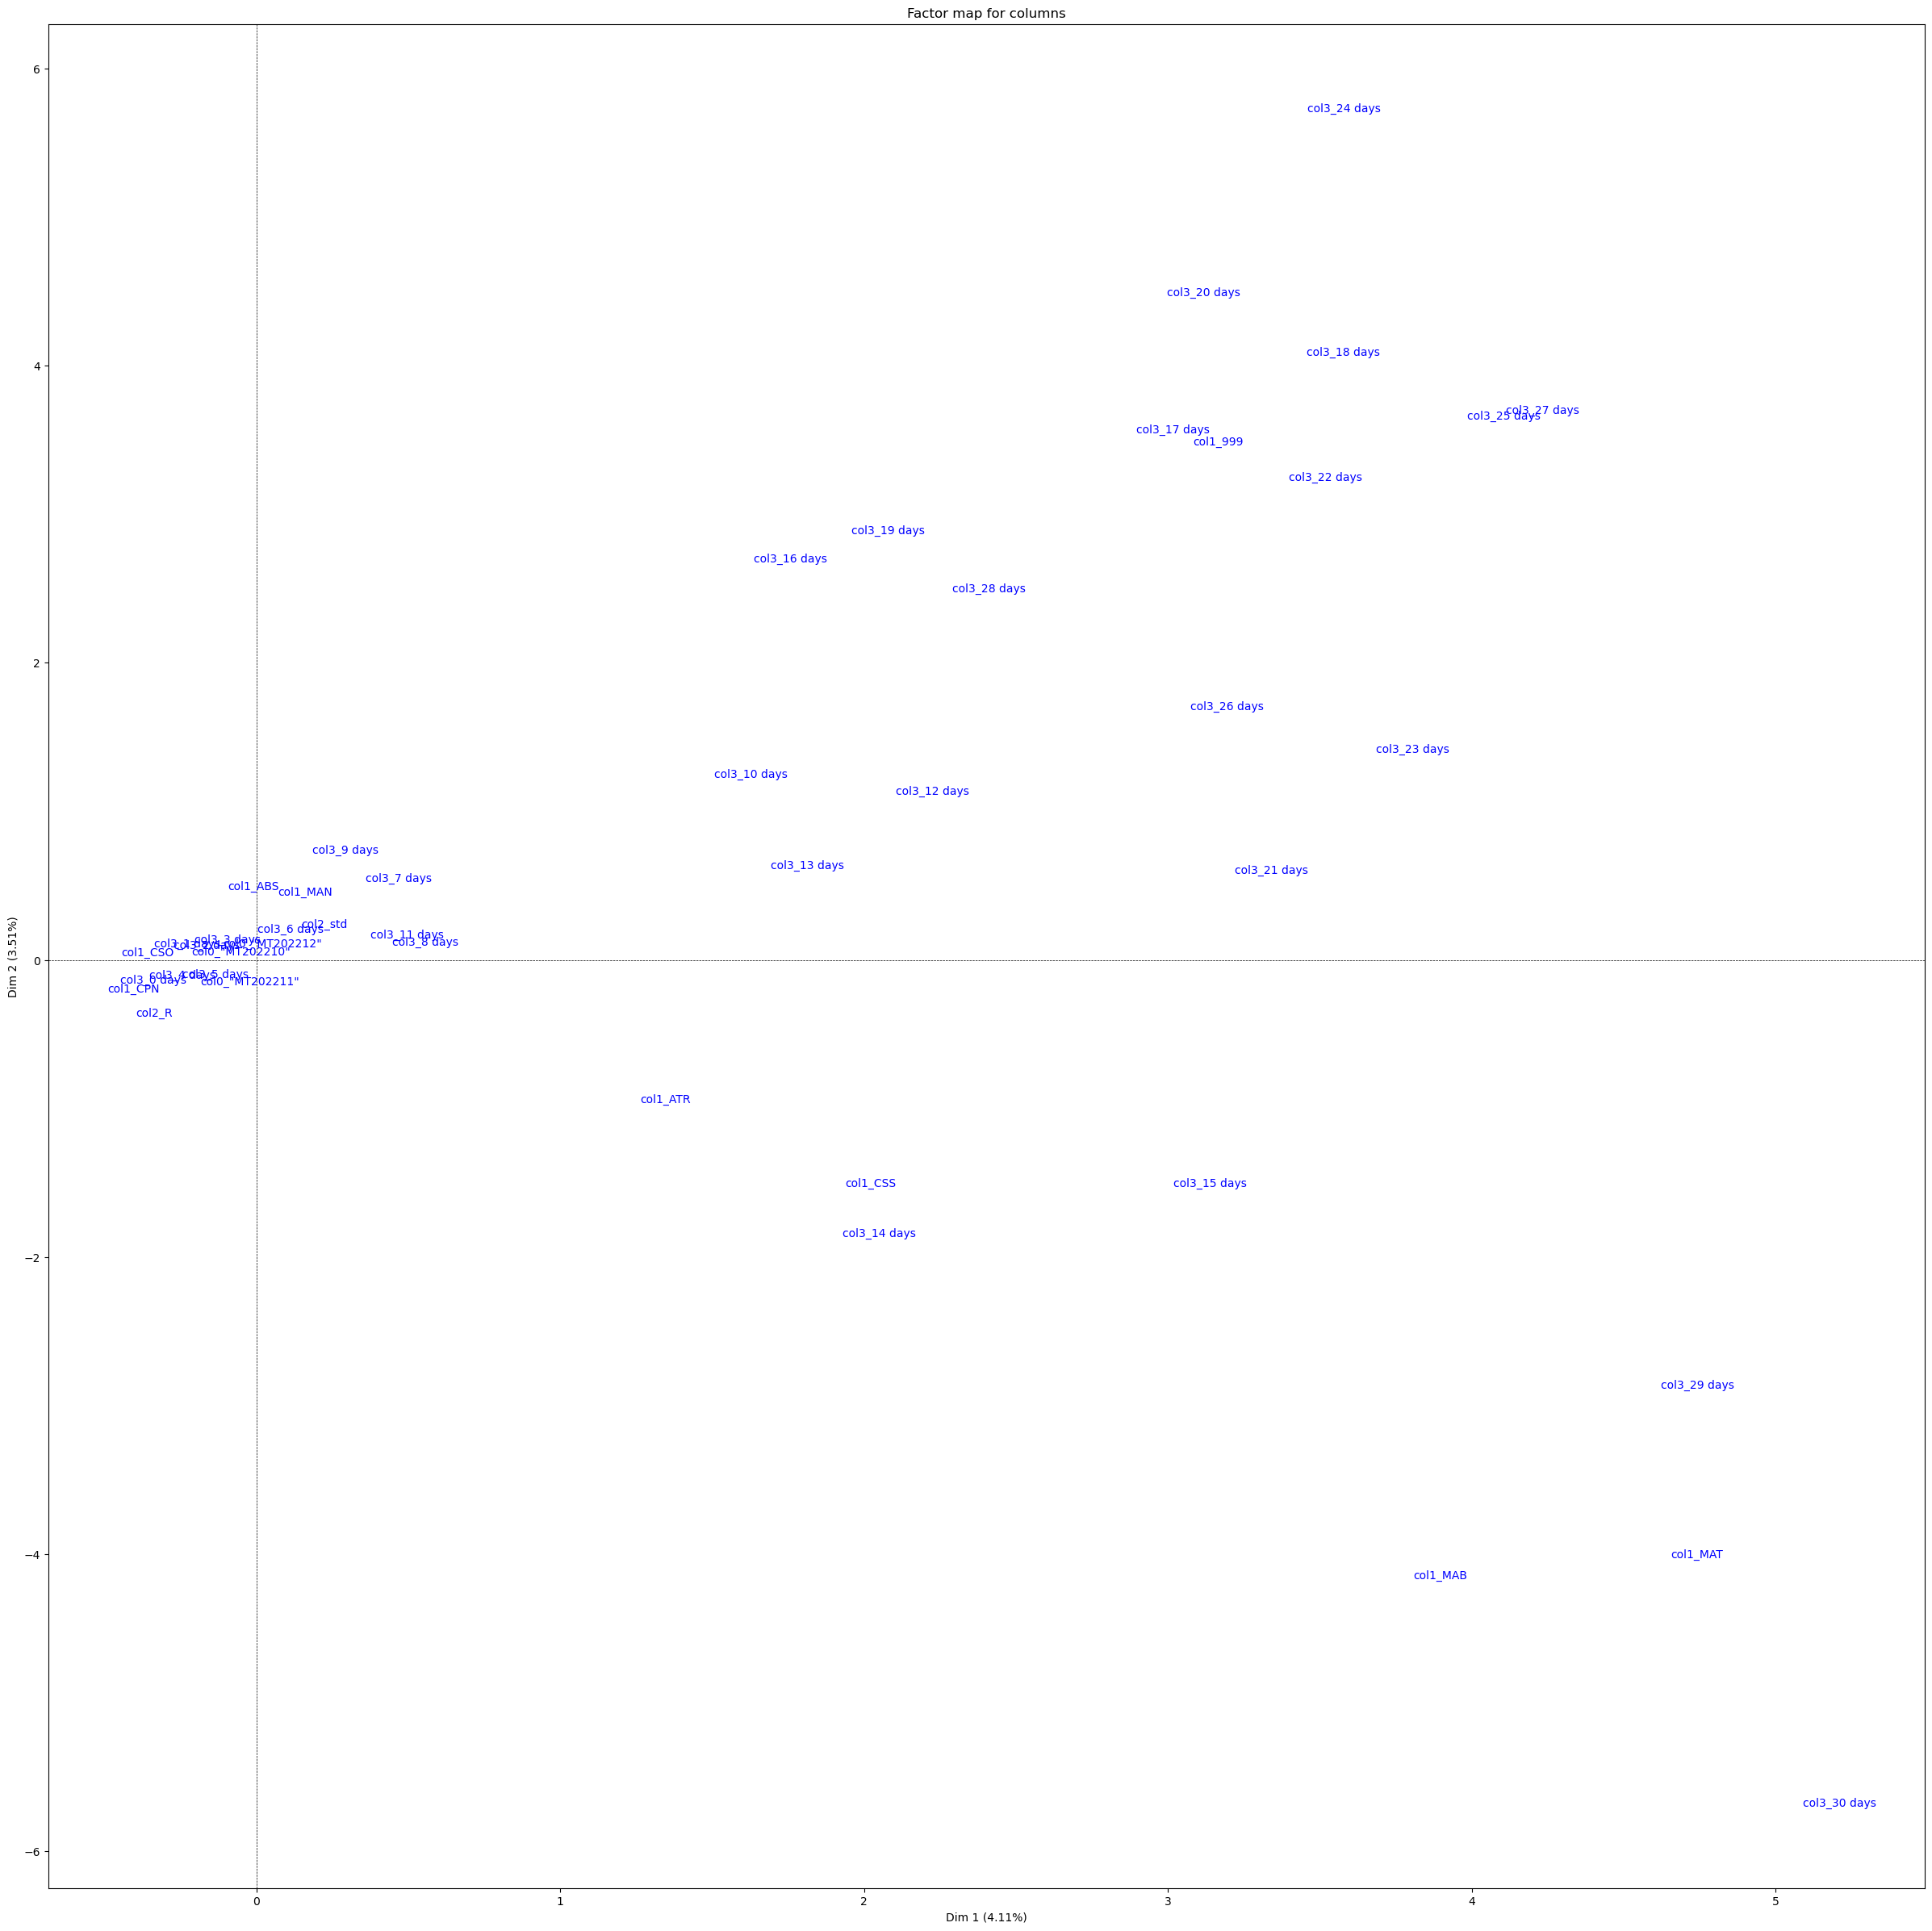

<Figure size 640x480 with 0 Axes>

In [123]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,short_labels=False, figsize=(30, 30))
plt.savefig('Factor_Map_col_30.png')

__________________________________________________
**Interpretation**
- **MAB & MAT** **(Maternity Leave (paid & unpaid))** Absence Reasons tend to be **29days** long.
- **999** Entry/Leave Absence reasons tend to take **17 to 22 days**
- **Unjustified Leave** & **Unpaid Sick Leave** tend to vary from **6 to 9days**
- **CSO : Social Leave** tends to be **1 to 3 days long**
- **CPN : Paid Leave** tends to be **4 to 5days**
________________________________
- **Source : R** tends to be used on CPN & CSO
- **Source : std(no recall)** tneds to be more frequent for **MAT & MAB**

__________________________________________________
__________________________________________________
**Interpretation**
- MOTIF2 : **PC & RN** are closest to MOTIF3 : **TR**
- MOTIF3 : **RN** is closest to MOTIF4 **EM**
- MOTIF2 ER & FR are supersposed
- MOTIF1 **RN** & MOTIF3 **EM** are superposed
- MOTIF1 **HC** & MOTIF1 **ER** are superposed
- MOTIF2 **AK** & MOTIF2 **AF** are closest to eachother, and closest to MOTIF1 **AJ**
- MOTIF3 **AK & AC** are closest to eachother

In [ ]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,short_labels=False, figsize=(100, 100))
plt.savefig('Factor_Map_col_100.png')

__________________________________________________
**Interpretation**
-  CODABS **CSS** & CODABS **ABS** are closest to eachother, as well as to **ATR** & MOTIF4 **ER**
- CODABS **MAT** is closest to MOTIF4 TR & MOTIF1 **AK**

In [ ]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(30, 30))
plt.savefig('Factor_Map_1_30.png')

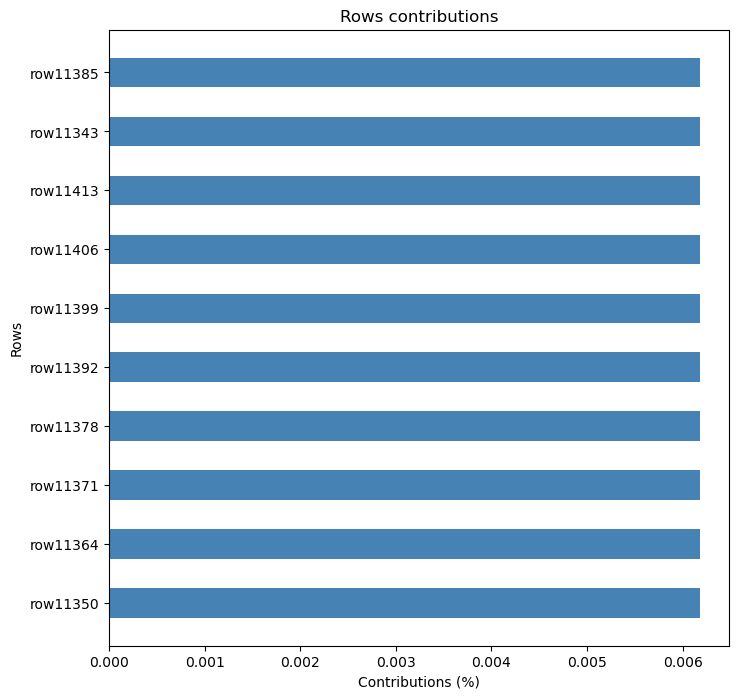

In [76]:
my_mca.plot_row_contrib(num_axis=1, nb_values=10, figsize=(8, 8))

### b. Dim 3 & 4

In [11]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=3, num_y_axis=4,short_labels=False, figsize=(100, 100))
plt.savefig('Factor_Map_col_100.png')

<Figure size 640x480 with 0 Axes>

fig dimensions = 200

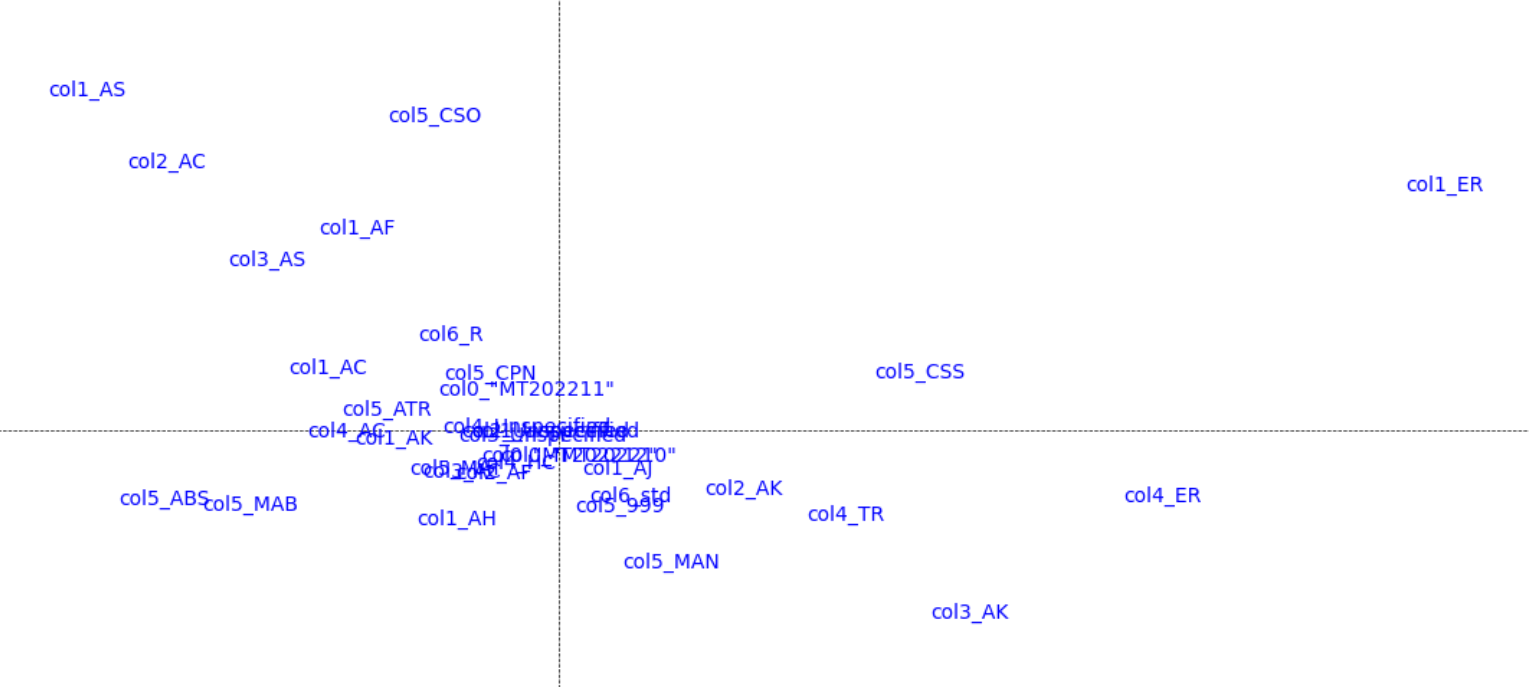

__________________________________________________
**Interpretation**
- **CODABS CSO** is closest to MOTIF1 : AS , MOTIF2 : Ac , MOTIF1 : AF , MOTIF3 : AS & SOURCE : **R**
- **CODABS : CSS** is closest to MOTIF4 : TR & ER, MOTIF3 : AK , **CODABS : MAN** and MOTIF2 : AK 
- **CODABS : ABS & MAB** are superposed and are closest to col1_AH
- **CODABS : CPN** is closest to col0_MT202211, AND they are alose closest to : SOURCE : **R**, **CODABS : ATR** , MOTIF1 : AC 

In [8]:
df_mca['SOURCE'].value_counts()

SOURCE
std    448839
R      319581
Name: count, dtype: int64